In [1]:
from scipy.integrate import RK45
import numpy as np 
import matplotlib.pyplot as plt
# %matplotlib widget
# plt.style.use('_mpl-gallery')
# plt.close()

In [2]:
#The Woods Saxon potential is
def V(R):
    V0 = -61.1 #MeV
    A = 10 #mass of the core
    Rws = 1.2*A**(1/3) #fm
    aws = 0.65 #fm
    return V0/(1+np.exp((R-Rws)/aws))


def f(R,y,L,E):
    c1 = 197.32075 #MeV fm -> hc
    c2 = 0.0478450 #1/(MeV fm2) -> 2u/hbar2
    return np.array([[y[1,0]],[y[0,0]*(L*(L+1)/R**2 + c2*(V(R)-E))]])

def RKmethod(Rn=np.array([]),yn=np.array([[0],[1]]),Lval=0,Eval=0,step_size = 0.01):
    u  = []
    for Rn in r_array:
        #define the parameters
        k1 = f(R=Rn,y=yn,L=Lval,E=Eval)
        k2 = f(R=Rn+0.5*step_size,y=yn+0.5*step_size*k1,L=Lval,E=Eval)
        k3 = f(R=Rn+0.5*step_size,y=yn+0.5*step_size*k2,L=Lval,E=Eval)
        k4 = f(R=Rn+step_size,y=yn+step_size*k3,L=Lval,E=Eval)
        #Redefine new functions
        yn = yn + (step_size/6)*(k1+2*k2+2*k3+k4)
        Rn = Rn + step_size
        u.append(yn[0,0])
    return u #u(r)

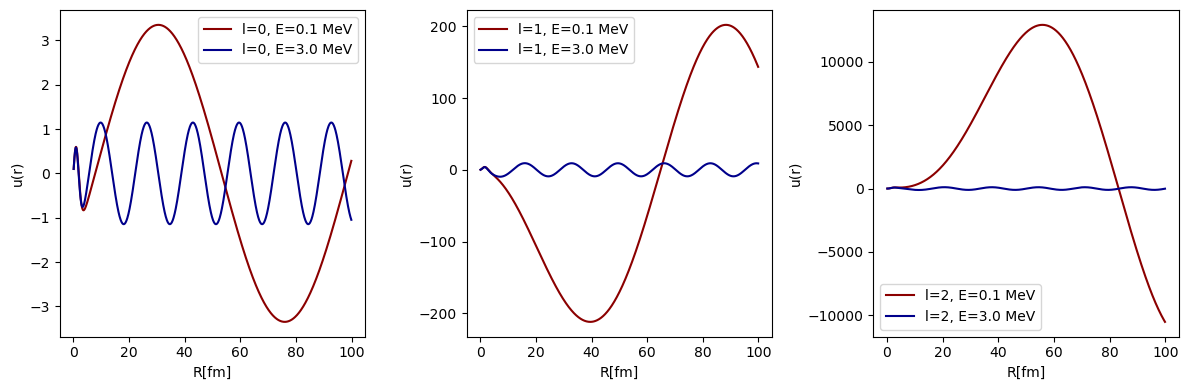

In [27]:
step_size = 0.1
r_array = np.arange(0.1,100,step_size)


fig, axs = plt.subplots(1,3,figsize=(12.0,4.0))

Energies = 0.1 #MeV
y_l0 = RKmethod(Rn=r_array,Lval=0,Eval=Energies,step_size=step_size)
axs[0].plot(r_array, y_l0,label=f"l=0, E={Energies} MeV",color='darkred')

y_l1 = RKmethod(Rn=r_array,Lval=1,Eval=Energies,step_size=step_size)
axs[1].plot(r_array, y_l1,label=f"l=1, E={Energies} MeV",color='darkred')

y_l2 = RKmethod(Rn=r_array,Lval=2,Eval=Energies,step_size=step_size)
axs[2].plot(r_array, y_l2,label=f"l=2, E={Energies} MeV",color='darkred')

Energies = 3.0 #MeV
y_l0 = RKmethod(Rn=r_array,Lval=0,Eval=Energies,step_size=step_size)
axs[0].plot(r_array, y_l0,label=f"l=0, E={Energies} MeV",color='darkblue')

y_l1 = RKmethod(Rn=r_array,Lval=1,Eval=Energies,step_size=step_size)
axs[1].plot(r_array, y_l1,label=f"l=1, E={Energies} MeV",color='darkblue')

y_l2 = RKmethod(Rn=r_array,Lval=2,Eval=Energies,step_size=step_size)
axs[2].plot(r_array, y_l2,label=f"l=2, E={Energies} MeV",color='darkblue')

for i in range(0,3):
    axs[i].set_xlabel("R[fm]")
    axs[i].set_ylabel("u(r)")
    axs[i].legend()

fig.tight_layout()

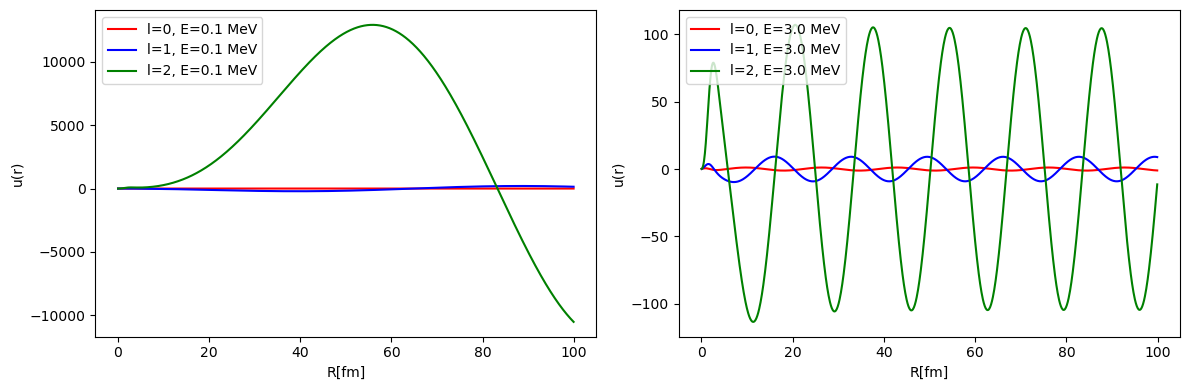

In [32]:
step_size = 0.1
r_array = np.arange(0.1,100,step_size)


fig, axs = plt.subplots(1,2,figsize=(12.0,4.0))

Energies = 0.1 #MeV
y_l0 = RKmethod(Rn=r_array,Lval=0,Eval=Energies,step_size=step_size)
axs[0].plot(r_array, y_l0,label=f"l=0, E={Energies} MeV",color='red')

y_l1 = RKmethod(Rn=r_array,Lval=1,Eval=Energies,step_size=step_size)
axs[0].plot(r_array, y_l1,label=f"l=1, E={Energies} MeV",color='blue')

y_l2 = RKmethod(Rn=r_array,Lval=2,Eval=Energies,step_size=step_size)
axs[0].plot(r_array, y_l2,label=f"l=2, E={Energies} MeV",color='green')

Energies = 3.0 #MeV
y_l0 = RKmethod(Rn=r_array,Lval=0,Eval=Energies,step_size=step_size)
axs[1].plot(r_array, y_l0,label=f"l=0, E={Energies} MeV",color='red')

y_l1 = RKmethod(Rn=r_array,Lval=1,Eval=Energies,step_size=step_size)
axs[1].plot(r_array, y_l1,label=f"l=1, E={Energies} MeV",color='blue')

y_l2 = RKmethod(Rn=r_array,Lval=2,Eval=Energies,step_size=step_size)
axs[1].plot(r_array, y_l2,label=f"l=2, E={Energies} MeV",color='green')

for i in range(0,2):
    axs[i].set_xlabel("R[fm]")
    axs[i].set_ylabel("u(r)")
    axs[i].legend()

fig.tight_layout()